# Week 7.
## Sentiment analysis first!

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords

In [2]:
imdb = pd.read_csv('imdb_dataset.csv', nrows=10000, encoding='cp949')  # read only the first XYZ rows
# encoding: just test which one works: utf-8, utf-16, euc-kr, cp949, latin_1

##  Preprocessing

In [3]:
reviews = pd.DataFrame(imdb)

In [4]:
stop_words = stopwords.words('english')

In [5]:
def preprocess_reviews(review):
    preprocessed_review = review
    preprocessed_review = re.sub(r'<.*?>', '', review)
    preprocessed_review = " ".join(word for word in preprocessed_review.split() if word not in stop_words)
    return preprocessed_review

In [6]:
reviews['Processed review'] = reviews['review'].apply(lambda x: preprocess_reviews(x))

In [7]:
from textblob import Word, TextBlob

In [8]:
text = TextBlob("Hello, I hat to admit, but I am working on Saturday night! I am leaving for a business trip in a couple of hours, damn")

In [9]:
# text.tags # just to show that you could do that
# text.sentences

In [10]:
text.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [11]:
reviews['polarity'] = reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [12]:
reviews['subjectivity'] = reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

## simple visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

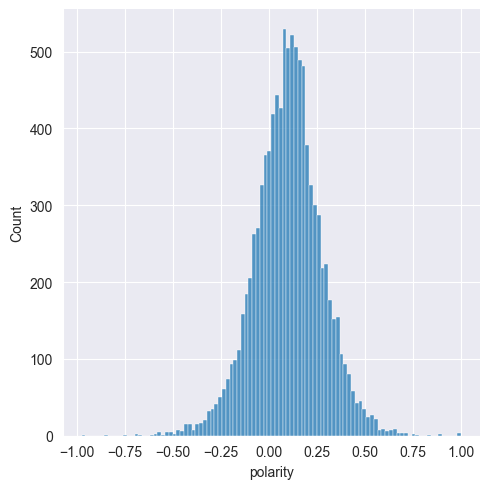

In [14]:
sns.displot(reviews['polarity'])

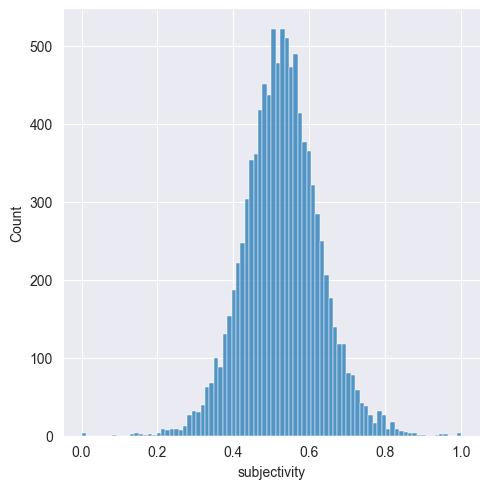

In [15]:
sns.displot(reviews['subjectivity'])